In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [5]:
df=pd.read_csv('/Users/rohithsunkara/Downloads/Fraud.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [15]:
df.isnull().sum().sum()

0

In [19]:
df.shape[0]

6362620

In [20]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

0.13

Text(0, 0.5, 'Count')

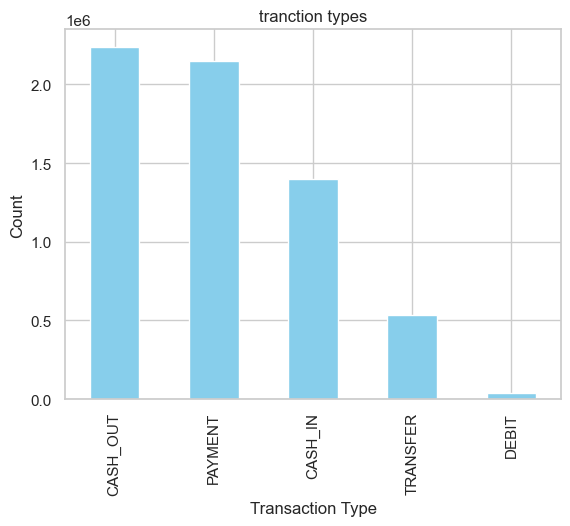

In [21]:
df['type'].value_counts().plot(kind='bar',title="tranction types",color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")

Text(0.5, 0, 'count')

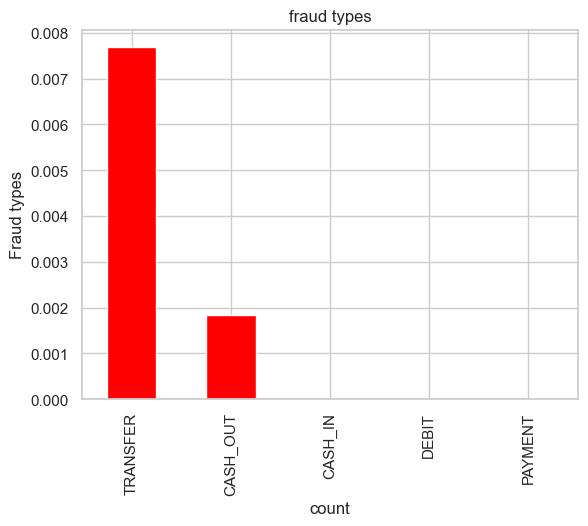

In [26]:
fruadbytype=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fruadbytype.plot(kind="bar",title="fraud types",color="Red")
plt.ylabel('Fraud types')
plt.xlabel("count")

In [27]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [28]:
df['amount'].median()

74871.94

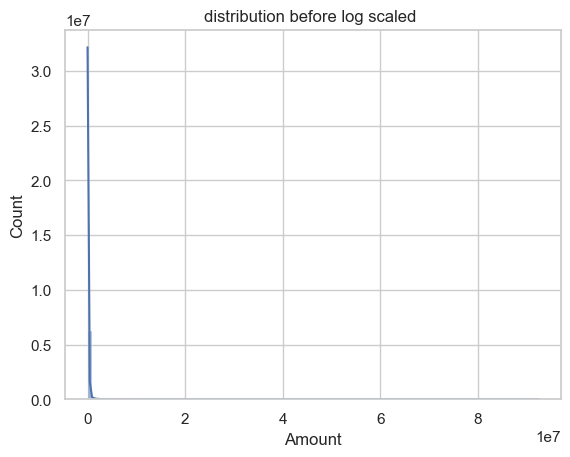

In [29]:
sns.histplot(df['amount'], bins = 100, kde = True)
plt.title("distribution before log scaled ")
plt.xlabel("Amount")
plt.show()

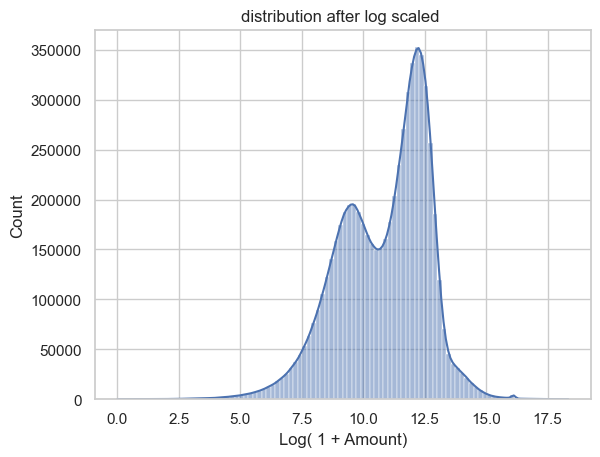

In [30]:
sns.histplot(np.log1p(df['amount']), bins = 100, kde = True)
plt.title("distribution after log scaled ")
plt.xlabel("Log( 1 + Amount)")
plt.show()

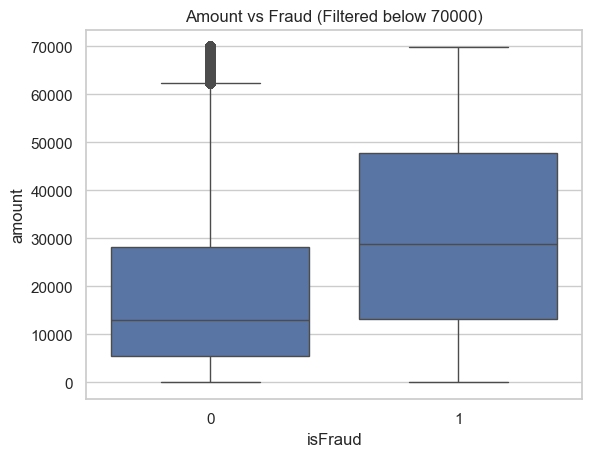

In [31]:
sns.boxplot(data = df[df['amount'] < 70000], x = 'isFraud', y = 'amount')
plt.title("Amount vs Fraud (Filtered below 70000)")
plt.show()


In [32]:

df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['oldbalanceDest'] - df['newbalanceDest']

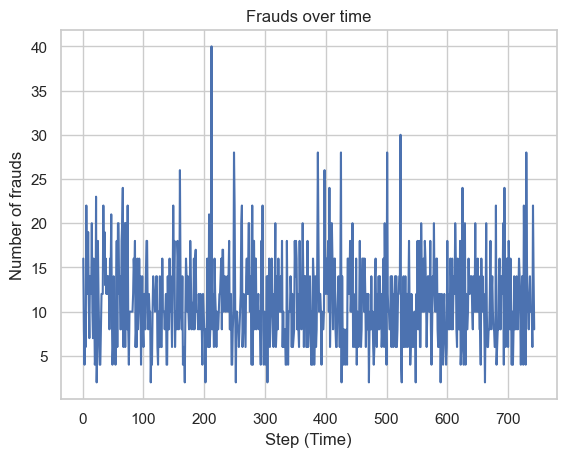

In [33]:
frauds_per_Step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()

plt.plot(frauds_per_Step.index, frauds_per_Step.values, label = "fraud per step")
plt.title("Frauds over time")
plt.xlabel("Step (Time)")
plt.ylabel("Number of frauds")
plt.grid(True)
plt.show()
# we gain that it is time independent so let's drop it

In [34]:
df.drop(columns = 'step', inplace=True)

In [35]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [36]:
top_recievers = df['nameDest'].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [37]:
fraud_users = df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)
fraud_users

nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64

In [38]:
transfer_and_cash_out_df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [39]:
transfer_and_cash_out_df['type'].value_counts()


type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

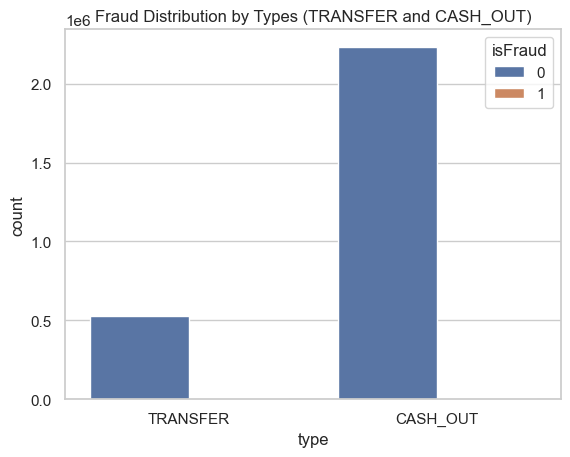

In [40]:
sns.countplot(data = transfer_and_cash_out_df, x ='type', hue = 'isFraud')
plt.title("Fraud Distribution by Types (TRANSFER and CASH_OUT)")
plt.show()

In [41]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [42]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

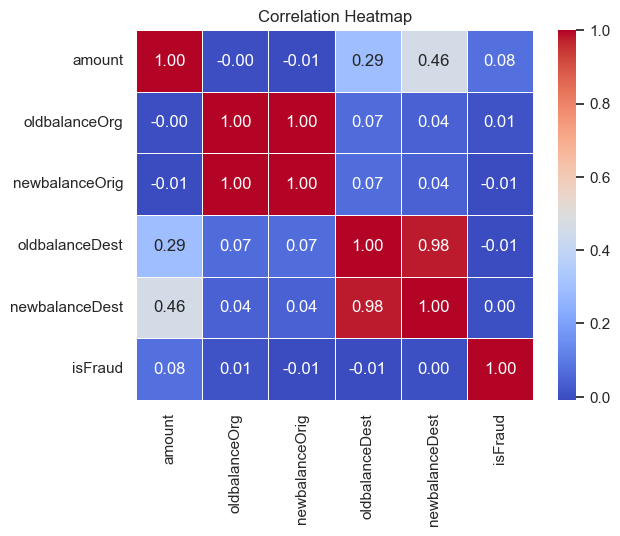

In [43]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")

In [44]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) & 
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [45]:
len(zero_after_transfer)

1188074

In [46]:
zero_after_transfer.sample(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
1796878,CASH_OUT,59909.36,C889989975,20841.00,0.0,C299387927,198370.40,258279.76,0,0,20841.00,-59909.36
620290,CASH_OUT,237170.35,C46164865,30160.00,0.0,C1281497588,2431433.20,2668603.55,0,0,30160.00,-237170.35
841707,CASH_OUT,115155.43,C942138120,23867.78,0.0,C2044792756,1805364.72,1920520.15,0,0,23867.78,-115155.43
5094048,CASH_OUT,141385.98,C9593454,10881.00,0.0,C733729422,0.00,229288.94,0,0,10881.00,-229288.94
4082691,TRANSFER,1878035.63,C848064380,1512.00,0.0,C31005914,136719.06,2014754.69,0,0,1512.00,-1878035.63


In [47]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [48]:
df_modeling = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

In [49]:
df_modeling.head() 

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [50]:
cat = ['type']
num = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [51]:
x = df_modeling.drop(columns='isFraud')
y = df_modeling['isFraud']


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(), cat)
    ]
) 

In [56]:
pipeline  = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

In [57]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [58]:
ypred = pipeline.predict(x_test)

In [59]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [60]:
pipeline.score(x_test, y_test)

0.9467064406381858

In [9]:
df=df.drop(["nameOrig",'nameDest'],axis=1)

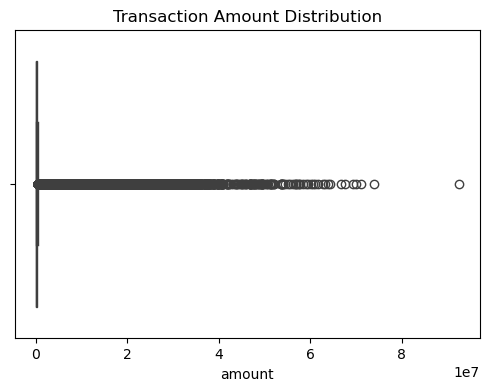

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["amount"])
plt.title("Transaction Amount Distribution")
plt.show()